In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans

In [14]:
# Load the dataset
df = pd.read_csv('hotel_bookings.csv')

In [15]:
# Data Preprocessing
# Handling missing values
df.fillna({'children': 0, 'company': -1, 'agent': -1}, inplace=True)

In [16]:
# Converting date columns
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [17]:
# Feature engineering
df['total_guests'] = df['adults'] + df['children'] + df['babies']

df['is_family'] = np.where(df['total_guests'] > 1, 1, 0)

df['stay_duration'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

In [18]:
# Categorical encoding
df_encoded = pd.get_dummies(df, columns=['hotel', 'meal', 'customer_type', 'market_segment', 'deposit_type'])

In [19]:
df_encoded

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable
0,0,342,2015,July,27,1,0,0,2,0.0,...,False,False,True,False,False,False,False,True,False,False
1,0,737,2015,July,27,1,0,0,2,0.0,...,False,False,True,False,False,False,False,True,False,False
2,0,7,2015,July,27,1,0,1,1,0.0,...,False,False,True,False,False,False,False,True,False,False
3,0,13,2015,July,27,1,0,1,1,0.0,...,False,True,False,False,False,False,False,True,False,False
4,0,14,2015,July,27,1,0,2,2,0.0,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,35,30,2,5,2,0.0,...,False,False,False,False,True,False,False,True,False,False
119386,0,102,2017,August,35,31,2,5,3,0.0,...,False,False,False,False,False,True,False,True,False,False
119387,0,34,2017,August,35,31,2,5,2,0.0,...,False,False,False,False,False,True,False,True,False,False
119388,0,109,2017,August,35,31,2,5,2,0.0,...,False,False,False,False,False,True,False,True,False,False


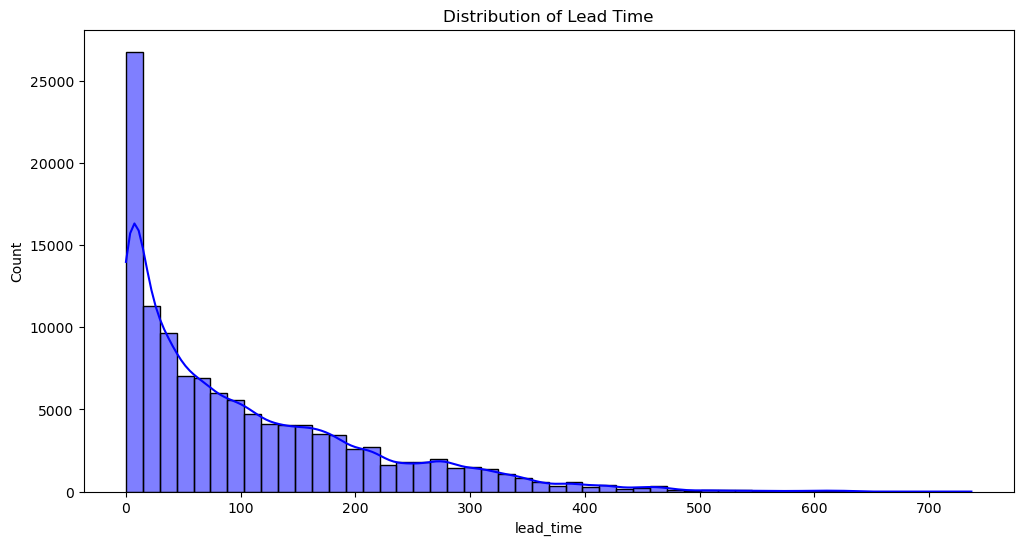

In [20]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12,6))
sns.histplot(df['lead_time'], bins=50, kde=True, color='blue')
plt.title('Distribution of Lead Time')
plt.show()

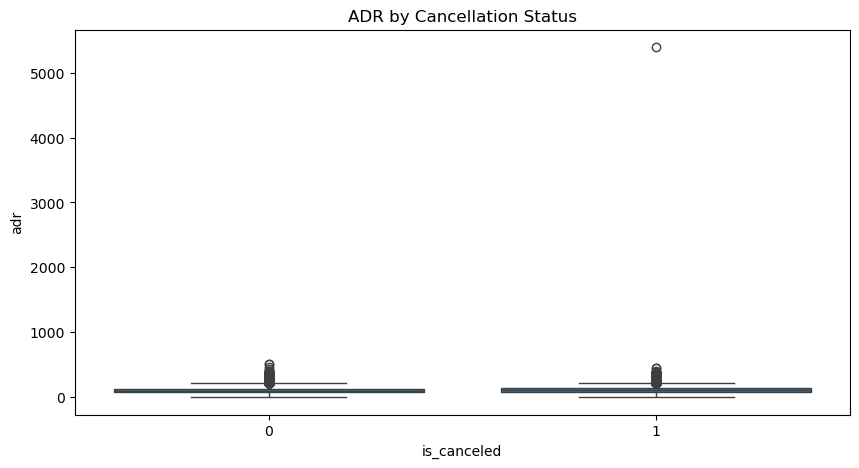

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='is_canceled', y='adr', data=df)
plt.title('ADR by Cancellation Status')
plt.show()

In [22]:
# Predictive Modeling
features = ['lead_time', 'total_guests', 'stay_duration', 'previous_cancellations', 'adr']
X = df_encoded[features]
y = df_encoded['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Model Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Model Accuracy: 0.791439819080325
              precision    recall  f1-score   support

           0       0.81      0.87      0.84     14907
           1       0.75      0.66      0.70      8971

    accuracy                           0.79     23878
   macro avg       0.78      0.77      0.77     23878
weighted avg       0.79      0.79      0.79     23878



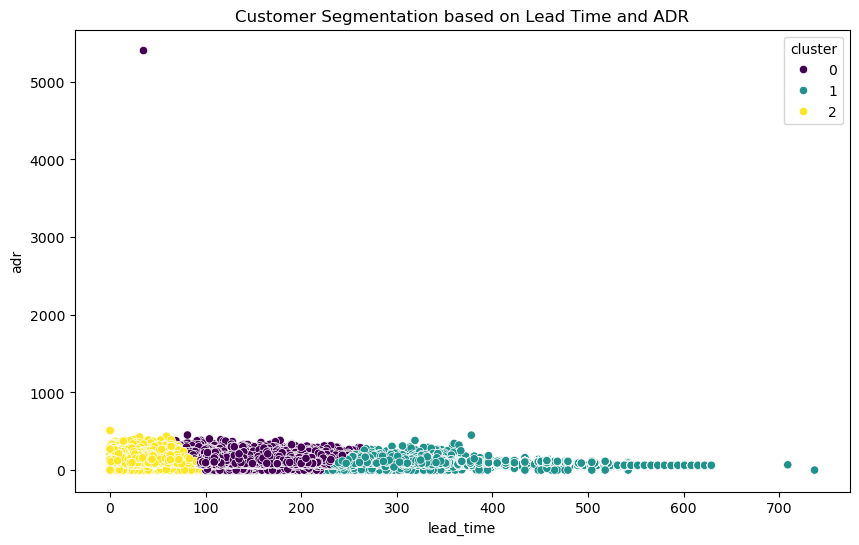

In [24]:
# Clustering Analysis
cluster_features = df[['lead_time', 'adr', 'total_guests']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(cluster_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='lead_time', y='adr', hue='cluster', data=df, palette='viridis')
plt.title('Customer Segmentation based on Lead Time and ADR')
plt.show()